# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [4]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [5]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [6]:
data['found']

262

Количество страниц в результатах поиска

In [7]:
data['pages']

27

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [8]:
df = pd.json_normalize(data['items'])
df

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-28T14:31:00+0300,2023-02-28T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77557573,False,Junior Data Scientist/Младший менеджер по обра...,NaN,False,False,None,None,2023-03-01T16:46:00+0300,2023-03-01T16:46:00+0300,...,Трубная,Люблинско-Дмитровская,10.177,10,55.767710,37.621926,NaN,groupm-70784-grum,"Группа компаний «Group4Media», Управляющая ком...",NaN
4,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-03-01T12:06:39+0300,2023-03-01T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-03-01T15:00:20+0300,2023-03-01T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,77480809,False,Data Scientist/ML,NaN,False,False,None,None,2023-02-28T12:42:26+0300,2023-02-28T12:42:26+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,76810036,False,Data Scientist (Middle+),NaN,False,False,None,None,2023-02-27T12:36:01+0300,2023-02-27T12:36:01+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,77536865,False,Data Scientist Junior/Junior+,NaN,False,False,None,None,2023-03-01T12:08:16+0300,2023-03-01T12:08:16+0300,...,Добрынинская,Кольцевая,5.36,5,55.728994,37.622533,NaN,NaN,NaN,NaN
9,77389499,False,Data Scientist (Junior+/Middle),NaN,False,False,None,None,2023-02-26T13:47:23+0300,2023-02-26T13:47:23+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [9]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [10]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [11]:
text_list=["\"Data Scientist\"", "\"Data Science\"",
           "\"Дата сайентист\"", "\"аналитик данных\"",
           "\"анализ данных\"", "\"Data Analyst\"",
           "\"исследователь данных\"", "\"ML-разработчик\""]
def getPage(page = 0, text = "Data Scientist"):
    """
    Получаем страницу со списком вакансий.
    По умолчанию достается первая страница со 100 вакансиями.
    """
    
    params = {
        'text': text,
        'area': 1,
        'page': page,
        'per_page': 100,
        'responses_count_enabled': True
    }
    
    URL = 'https://api.hh.ru/vacancies'
    req_analyst = requests.get(URL, params)
    data_analyst = json.loads(req_analyst.content.decode())
    

    req_analyst.close
    return data_analyst

Посмотрим на количество найденных вакансий c повторами:

In [12]:
vacancy_count = 0
vacancy_count_i = 0
for i in range(0, len(text_list)):
    vacancy_count_i = getPage(0, text_list[i])['found']
    if (vacancy_count_i<2000):
        print("у запроса: " + text_list[i] + " - учли все " + str(vacancy_count_i) + " значений")
    else:
        vacancy_count_i = 2000
        print("у запроса: " + text_list[i] + " - прочитали первые 2000 значений, больше не позволяет hh")
        # При указании параметров пагинации (page, per_page) работает ограничение:
        # глубина возвращаемых результатов не может быть больше 2000. 
    vacancy_count += vacancy_count_i
    if i==0:
        datafr_analyst = pd.json_normalize(getPage()['items'])
        if (int(vacancy_count_i/100)>=1):
            if vacancy_count_i == 2000:
                vacancy_count_i-=1;
            for page in range(1, int(vacancy_count_i/100)+1):
                # Считываем данные постранично.
                datafr_analyst = datafr_analyst.append(pd.json_normalize(getPage(page)['items']), ignore_index = True )
                # Задержка времени, чтобы не нагружать hh.
                sleep(0.25)
    else:
        if vacancy_count_i == 2000:
            vacancy_count_i-=1; # для корректного вычисления следующей строки.
        for page in range(0, int(vacancy_count_i/100)+1):
            # Считываем данные постранично.
            datafr_analyst = datafr_analyst.append(pd.json_normalize(getPage(page, text_list[i])['items']), ignore_index = True )
            # Задержка времени, чтобы не нагружать hh.
            sleep(0.25)
print("Всего мы учли запросов с повторами: " + str(vacancy_count))

у запроса: "Data Scientist" - учли все 259 значений
у запроса: "Data Science" - учли все 376 значений
у запроса: "Дата сайентист" - учли все 8 значений
у запроса: "аналитик данных" - учли все 612 значений
у запроса: "анализ данных" - прочитали первые 2000 значений, больше не позволяет hh
у запроса: "Data Analyst" - учли все 165 значений
у запроса: "исследователь данных" - учли все 11 значений
у запроса: "ML-разработчик" - учли все 21 значений
Всего мы учли запросов с повторами: 3452


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [13]:
datafr_analyst = datafr_analyst.drop_duplicates(subset=['id'])

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [14]:
counters = datafr_analyst['counters.responses'].to_frame()
counters.reset_index(inplace=True)
counters = counters.drop(columns=['index'])
for j in range(0, len(datafr_analyst)):
    vacancy = datafr_analyst['id'].iloc[j]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    
    if j==0:
        final_datafr_analyst = pd.json_normalize(vacancy_info)
    else:
        final_datafr_analyst = final_datafr_analyst.append(pd.json_normalize(vacancy_info), ignore_index = True)

final_datafr_analyst = final_datafr_analyst[["id", "name", "key_skills",
                                             "employer.name", "employer.id",
                                             "experience.name", "experience.id",
                                             "address.lat", "address.lng", "salary.from",
                                             "salary.to", "salary.currency", "salary.gross"]]

final_datafr_analyst = pd.concat([final_datafr_analyst, counters], sort=False, axis=1)
writer = pd.ExcelWriter('Task4_data.xlsx')
final_datafr_analyst.to_excel(writer)
writer.save()

#final_datafr_analyst

При появлении ошибки с требованием ввести капчу нужно пройти ее по адресу: captcha_url + &backurl= + http://127.0.0.1:5500/index.html

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

Считаем файл с собранными данными:

In [15]:
data_from_file = pd.read_excel('Task4_data.xlsx', index_col=0)

Посмотрим на количество вакансий в файле:

In [16]:
len(data_from_file)

2863

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [17]:
list_key_skills=[]
# Ищем key_skills среди всех вакансий в файле.
for k in range(0, len(data_from_file)):
    key_skills = data_from_file["key_skills"][k]
    # Игнорируем записи, где key_skills = [].
    if key_skills!="[]":
        # удаляем первый и последний символ [ и ].
        key_skills = key_skills[1 : -1]
        splited_skills = key_skills.split("{")
        del splited_skills[0] # удаляем первый элемент list, (там всегда пустая строка).
        # удаляем лишние символы с начала и конца у каждого элемента.
        for m in range(0, len(splited_skills)-1):
            splited_skills[m] = splited_skills[m][9 : -4]
        splited_skills[len(splited_skills)-1] = splited_skills[len(splited_skills)-1][9 : -2]
        # Добавляем key_skills к общему list.
        list_key_skills = list_key_skills + splited_skills

# Создаем словарь с кол-вом встреченных key_skills.
top_key_skills= dict((x, list_key_skills.count(x)) for x in set(list_key_skills))
# Преобразуем словарь в dataframe.
top_key_skills_df = pd.DataFrame.from_dict(top_key_skills, orient='index')
top_key_skills_df.reset_index(inplace=True)
top_key_skills_df.columns = ['key_skills', 'count']
top_key_skills_df = top_key_skills_df.sort_values(by=['count'], ascending=False)
top_key_skills_df = top_key_skills_df.set_index('key_skills')
print(top_key_skills_df.head(15))

                                     count
key_skills                                
Анализ данных                          950
SQL                                    831
Python                                 637
Аналитическое мышление                 558
MS PowerPoint                          314
Работа с большим объемом информации    310
Английский язык                        215
MS Excel                               197
Аналитика                              189
Аналитические исследования             178
MS SQL                                 169
Работа в команде                       149
Статистический анализ                  147
Power BI                               145
Excel                                  135


**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [18]:
salary_data = data_from_file[[ "salary.from","salary.to",
                              "salary.currency", "salary.gross"]]
# Отбросим данные, где 0 информации о зарплате
salary_data = salary_data.dropna(how='all')
salary_data['avg_salary'] = np.nan
# Найдем среднее значение зарплаты
for g in range(0, len(salary_data)):
    if salary_data['salary.from'].iloc[g]>=0 and salary_data['salary.to'].iloc[g]>=0:
        # кладем значение в g-й строке в 4 столбец avg_salary.
        salary_data.iat[g, 4] = (salary_data['salary.from'].iloc[g] + salary_data['salary.to'].iloc[g])/2
    elif salary_data['salary.from'].iloc[g]>=0:
        salary_data.iat [g, 4] = salary_data['salary.from'].iloc[g]
    elif salary_data['salary.to'].iloc[g]>=0:
        salary_data.iat [g, 4] = salary_data['salary.to'].iloc[g]
        
# Переведем все зарплаты в рубли.
EUR_TO_RUR = 79.40
USD_TO_RUR = 74.93
salary_data['avg_salary_rur'] = np.nan
for g in range(0, len(salary_data)):
    if salary_data['salary.currency'].iloc[g]=="EUR":
        # salary_data.iat[g, 5] кладем значение в g-й строке в 5 столбец.
        salary_data.iat[g, 5] = salary_data['avg_salary'].iloc[g] * EUR_TO_RUR
    elif salary_data['salary.currency'].iloc[g]=="USD":
        salary_data.iat[g, 5] = salary_data['avg_salary'].iloc[g] * USD_TO_RUR
    elif salary_data['salary.currency'].iloc[g]=="RUR":
        salary_data.iat[g, 5] = salary_data['avg_salary'].iloc[g]

# Учтем вычет налогов.
gross_multiplier = 0.87
salary_data['avg_sal_rur_after_taxes'] = np.nan
for g in range(0, len(salary_data)):
    if salary_data['salary.gross'].iloc[g]==1:
        # salary_data.iat[g, 6] кладем значение в g-й строке в 6 столбец.
        salary_data.iat[g, 6] = salary_data['avg_salary_rur'].iloc[g] * gross_multiplier
    elif salary_data['salary.gross'].iloc[g]==0:
        salary_data.iat[g, 6] = salary_data['avg_salary_rur'].iloc[g]
salary_data

,salary.from,salary.to,salary.currency,salary.gross,avg_salary,avg_salary_rur,avg_sal_rur_after_taxes
0,200000.0,240000.0,RUR,0.0,220000.0,220000.0,220000.00
1,160000.0,200000.0,RUR,0.0,180000.0,180000.0,180000.00
2,150000.0,300000.0,RUR,0.0,225000.0,225000.0,225000.00
4,250000.0,350000.0,RUR,0.0,300000.0,300000.0,300000.00
8,170000.0,240000.0,RUR,0.0,205000.0,205000.0,205000.00
...,...,...,...,...,...,...,...
2842,3500.0,NaN,USD,1.0,3500.0,262255.0,228161.85
2844,60000.0,90000.0,RUR,0.0,75000.0,75000.0,75000.00
2848,NaN,1500.0,USD,0.0,1500.0,112395.0,112395.00
2849,230000.0,NaN,RUR,0.0,230000.0,230000.0,230000.00


Визуализируем статистику по зарплате с помощью гистограммы:

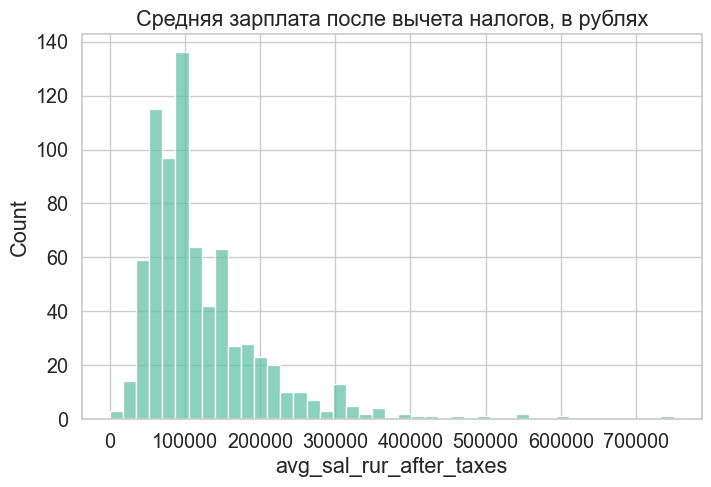

In [19]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 5))
    figure = sns.histplot(data=salary_data, x='avg_sal_rur_after_taxes')
    figure.set_title("Средняя зарплата после вычета налогов, в рублях")

Видим, что работая аналитиком данных, можно расчитывать на зарплату около 100000 рублей после вычета налогов. Однако также есть вакансии с зарплатой 200 - 300 тысяч рублей. Иногда зарплата может быть еще намного выше. Необходимо учитывать, что самые большие суммы работадатели могут не указывать в вакансии на сайте hh.ru, а сообщать при личном общении.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Проведем аналогичный анализ для бизнес/системных аналитиков.

In [20]:
text_list2=["\"Бизнес аналитик\"", "\"Стратег аналитик\"",
            "\"Анализ бизнеса\"", "\"Бизнес анализ\"",
            "\"Business Operations Analyst\"", "\"Systems Analyst\"",
            "\"Системный анализ\"", "\"Системный аналитик\"",
            "\"Business analysis\"", "\"Business-analyst\""]

Посмотрим на количество найденных вакансий c повторами:

In [21]:
vacancy_count = 0
vacancy_count_i = 0
for i in range(0, len(text_list2)):
    vacancy_count_i = getPage(0, text_list2[i])['found']
    if (vacancy_count_i<2000):
        print("у запроса: " + text_list2[i] + " - учли все " + str(vacancy_count_i) + " значений")
    else:
        vacancy_count_i = 2000
        print("у запроса: " + text_list2[i] + " - прочитали первые 2000 значений, больше не позволяет hh")
        # При указании параметров пагинации (page, per_page) работает ограничение:
        # глубина возвращаемых результатов не может быть больше 2000. 
    vacancy_count += vacancy_count_i
    if i==0:
        datafr_b_analyst = pd.json_normalize(getPage(0, text_list2[0])['items'])
        if (int(vacancy_count_i/100)>=1):
            if vacancy_count_i == 2000:
                vacancy_count_i-=1;
            for page in range(1, int(vacancy_count_i/100)+1):
                # Считываем данные постранично.
                datafr_b_analyst = datafr_b_analyst.append(pd.json_normalize(getPage(page, text_list2[0])['items']), ignore_index = True )
                # Задержка времени, чтобы не нагружать hh.
                sleep(0.25)
    else:
        if vacancy_count_i == 2000:
            vacancy_count_i-=1; # для корректного вычисления следующей строки.
        for page in range(0, int(vacancy_count_i/100)+1):
            # Считываем данные постранично.
            datafr_b_analyst = datafr_b_analyst.append(pd.json_normalize(getPage(page, text_list2[i])['items']), ignore_index = True )
            # Задержка времени, чтобы не нагружать hh.
            sleep(0.25)
print("Всего мы учли запросов с повторами: " + str(vacancy_count))

у запроса: "Бизнес аналитик" - учли все 1651 значений
у запроса: "Стратег аналитик" - учли все 20 значений
у запроса: "Анализ бизнеса" - учли все 1427 значений
у запроса: "Бизнес анализ" - учли все 1407 значений
у запроса: "Business Operations Analyst" - учли все 2 значений
у запроса: "Systems Analyst" - учли все 1842 значений
у запроса: "Системный анализ" - учли все 965 значений
у запроса: "Системный аналитик" - учли все 1842 значений
у запроса: "Business analysis" - учли все 1407 значений
у запроса: "Business-analyst" - учли все 1651 значений
Всего мы учли запросов с повторами: 12214


В полученную выборку некоторые вакансии могли попасть несколько раз. Удаляем дубликаты.

In [22]:
datafr_b_analyst = datafr_b_analyst.drop_duplicates(subset=['id'])

Загружаем подробное описание каждой вакансии и создаем удобную для дальнейших действий таблицу данных, сохраняем её.

In [23]:
counters = datafr_b_analyst['counters.responses'].to_frame()
counters.reset_index(inplace=True)
counters = counters.drop(columns=['index'])
for j in range(3994, len(datafr_b_analyst)):
    vacancy = datafr_b_analyst['id'].iloc[j]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    
    if j==0:
        final_datafr_b_analyst = pd.json_normalize(vacancy_info)
    else:
        final_datafr_b_analyst = final_datafr_b_analyst.append(pd.json_normalize(vacancy_info), ignore_index = True)

final_datafr_b_analyst = final_datafr_b_analyst[["id", "name", "key_skills",
                                                 "employer.name", "employer.id",
                                                 "experience.name", "experience.id",
                                                 "address.lat", "address.lng", "salary.from",
                                                 "salary.to", "salary.currency", "salary.gross"]]

final_datafr_b_analyst = pd.concat([final_datafr_b_analyst, counters], sort=False, axis=1)

writer = pd.ExcelWriter('Task4_data_2.xlsx')
final_datafr_b_analyst.to_excel(writer)
writer.save()

#final_datafr_b_analyst

При появлении ошибки с требованием ввести капчу нужно пройти ее по адресу: captcha_url + &backurl= + http://127.0.0.1:5500/index.html

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [24]:
data_from_file_2 = pd.read_excel('Task4_data_2.xlsx', index_col=0)

In [25]:
len(data_from_file_2)

5055

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [26]:
list_key_skills=[]
# Ищем key_skills среди всех вакансий в файле.
for k in range(0, len(data_from_file_2)):
    key_skills = data_from_file_2["key_skills"][k]
    # Игнорируем записи, где key_skills = [].
    if key_skills!="[]":
        # удаляем первый и последний символ [ и ].
        key_skills = key_skills[1 : -1]
        splited_skills = key_skills.split("{")
        del splited_skills[0] # удаляем первый элемент list, (там всегда пустая строка).
        # удаляем лишние символы с начала и конца у каждого элемента.
        for m in range(0, len(splited_skills)-1):
            splited_skills[m] = splited_skills[m][9 : -4]
        splited_skills[len(splited_skills)-1] = splited_skills[len(splited_skills)-1][9 : -2]
        # Добавляем key_skills к общему list.
        list_key_skills = list_key_skills + splited_skills

# Создаем словарь с кол-вом встреченных key_skills.
top_key_skills= dict((x, list_key_skills.count(x)) for x in set(list_key_skills))
# Преобразуем словарь в dataframe.
top_key_skills_df = pd.DataFrame.from_dict(top_key_skills, orient='index')
top_key_skills_df.reset_index(inplace=True)
top_key_skills_df.columns = ['key_skills', 'count']
top_key_skills_df = top_key_skills_df.sort_values(by=['count'], ascending=False)
top_key_skills_df = top_key_skills_df.set_index('key_skills')
print(top_key_skills_df.head(15))

                                count
key_skills                           
SQL                              1080
Бизнес-анализ                    1030
BPMN                              827
UML                               636
Аналитическое мышление            635
Системный анализ                  609
Анализ бизнес показателей         560
Управление проектами              545
Разработка технических заданий    429
Atlassian Jira                    363
Английский язык                   327
REST                              310
MS PowerPoint                     292
Моделирование бизнес процессов    285
Постановка задач разработчикам    280


**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [27]:
salary_data = data_from_file_2[[ "salary.from","salary.to",
                                 "salary.currency", "salary.gross"]]
# Отбросим данные, где 0 информации о зарплате
salary_data = salary_data.dropna(how='all')
salary_data['avg_salary'] = np.nan
# Найдем среднее значение зарплаты
for g in range(0, len(salary_data)):
    if salary_data['salary.from'].iloc[g]>=0 and salary_data['salary.to'].iloc[g]>=0:
        # кладем значение в g-й строке в 4 столбец avg_salary.
        salary_data.iat[g, 4] = (salary_data['salary.from'].iloc[g] + salary_data['salary.to'].iloc[g])/2
    elif salary_data['salary.from'].iloc[g]>=0:
        salary_data.iat [g, 4] = salary_data['salary.from'].iloc[g]
    elif salary_data['salary.to'].iloc[g]>=0:
        salary_data.iat [g, 4] = salary_data['salary.to'].iloc[g]
        
# Переведем все зарплаты в рубли.
EUR_TO_RUR = 79.40
USD_TO_RUR = 74.93
salary_data['avg_salary_rur'] = np.nan
for g in range(0, len(salary_data)):
    if salary_data['salary.currency'].iloc[g]=="EUR":
        # salary_data.iat[g, 5] кладем значение в g-й строке в 5 столбец.
        salary_data.iat[g, 5] = salary_data['avg_salary'].iloc[g] * EUR_TO_RUR
    elif salary_data['salary.currency'].iloc[g]=="USD":
        salary_data.iat[g, 5] = salary_data['avg_salary'].iloc[g] * USD_TO_RUR
    elif salary_data['salary.currency'].iloc[g]=="RUR":
        salary_data.iat[g, 5] = salary_data['avg_salary'].iloc[g]

# Учтем вычет налогов.
gross_multiplier = 0.87
salary_data['avg_sal_rur_after_taxes'] = np.nan
for g in range(0, len(salary_data)):
    if salary_data['salary.gross'].iloc[g]==1:
        # salary_data.iat[g, 6] кладем значение в g-й строке в 6 столбец.
        salary_data.iat[g, 6] = salary_data['avg_salary_rur'].iloc[g] * gross_multiplier
    elif salary_data['salary.gross'].iloc[g]==0:
        salary_data.iat[g, 6] = salary_data['avg_salary_rur'].iloc[g]

salary_data

,salary.from,salary.to,salary.currency,salary.gross,avg_salary,avg_salary_rur,avg_sal_rur_after_taxes
0,250000.0,320000.0,RUR,1.0,285000.0,285000.0,247950.0
1,250000.0,400000.0,RUR,0.0,325000.0,325000.0,325000.0
2,200000.0,300000.0,RUR,0.0,250000.0,250000.0,250000.0
3,50000.0,90000.0,RUR,0.0,70000.0,70000.0,70000.0
4,25000.0,50000.0,RUR,1.0,37500.0,37500.0,32625.0
...,...,...,...,...,...,...,...
5026,150000.0,200000.0,RUR,0.0,175000.0,175000.0,175000.0
5035,55000.0,NaN,RUR,1.0,55000.0,55000.0,47850.0
5036,NaN,220000.0,RUR,0.0,220000.0,220000.0,220000.0
5041,60000.0,80000.0,RUR,1.0,70000.0,70000.0,60900.0


Визуализируем статистику по зарплате с помощью гистограммы:

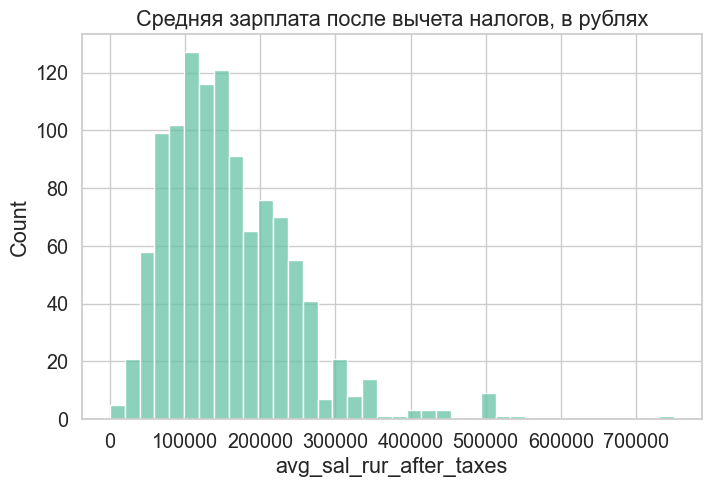

In [28]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 5))
    figure = sns.histplot(data=salary_data, x='avg_sal_rur_after_taxes')
    figure.set_title("Средняя зарплата после вычета налогов, в рублях")

Не забывайте про выводы.

Зарплата бизнес/системного аналитика по данным с hh.ru чаще всего в диапазоне 100 - 250 тысяч рублей. Из ключевых прикладных навыков можно отметить, что часто требуется знание SQL, BPMN, UML, Atlassian Jira. В отчие от аналитиков данных тут знание языков программирования не оказалось часто встречающимся ключевым навыком, там еще было нужно знание Python.
Запросы надо писать аккуратнее, т.к., например, из-за запроса "\"Системный анализ\"" выдалась вакансия консультанта правового отдела, что совсем не соответствует нашим целям. Однако общая статистика по ключевым навыкам и средней зарплате выглядит правдоподобно для обеих исследуемых профессий.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Проведем дальнейший анализ вакансий аналитика данных. 

Ответим на вопрос: какой опыт требуется для данной вакансии?

In [29]:
data_from_file = pd.read_excel('Task4_data.xlsx', index_col=0)
experience_data = data_from_file[["experience.name", "experience.id"]]
experience_data =  experience_data.dropna(how='all')
experience_data['experience.name'].value_counts()

От 1 года до 3 лет    1386
От 3 до 6 лет         1207
Более 6 лет            135
Нет опыта              135
Name: experience.name, dtype: int64

Видим, что почти все вакансии требуют наличия опыта от 1 до 6 лет. Достаточно мало вакансий, в которых не требуется опыт работы или требуется опыт более 6 лет, однако и такие реально найти.

Ответим на вопрос: Какие работодатели в топе?

Работодатель в топе, если у него большое количество откликов на вакансию (counters.responses).

In [30]:
data_from_file = pd.read_excel('Task4_data.xlsx', index_col=0)
employer_data = data_from_file[["id", "name", "employer.name", "employer.id", "counters.responses"]]
employer_data =  employer_data.dropna(how='all')
employer_data = employer_data.sort_values(by='counters.responses', ascending=False)
# Оставим только те вакансии, где в названии содержатся ключевые слова, т.к. до этого мы проверяли тест на слова.
# Из-за фразы 'анализ данных' выдались вакансии, совсем не соответствующие нашему запросу. 
res_empl = employer_data[employer_data["name"].str.contains("аналитик | Аналитик | Data | ML | analyst | Analyst")]
res_empl.head(20)

,id,name,employer.name,employer.id,counters.responses
2023,77347089,Удаленный стажер-аналитик (графовые базы данных),MindSet,3666817.0,1400
100,76705049,Стажер Data Scientist,СБЕР,3529.0,1121
2025,76583014,Финансовый аналитик (удаленно),FlexProtect (ИП Ковалев Александр Сергеевич),5756921.0,797
855,76565072,Аналитик данных | Data Analyst,Зигмунд Онлайн,3927492.0,680
72,76975464,Junior Data scientist (RecSys),Спортмастер,2343.0,590
728,76418611,Аналитик/BI аналитик (Tableau),АНАЛИТИКА ПЛЮС,925973.0,586
1590,76670886,Продуктовый аналитик (стажер),МТС,3776.0,531
88,76911900,Junior/Middle Data Scientist SberData,СБЕР,3529.0,494
556,77334669,Аналитик данных / Data Analyst,Юрент,678191.0,489
2042,76608747,Аналитик по доставке данных (Delivery Analyst),Стритби Хайв,1635833.0,481


Получили, что в топ 20 почти все профессии соответствуют профессии Data Scientist. Видим, что чаще всего много откликов у стажеров / Junior аналитиков, что вполне соответствует ожиданиям, т.к. на низкие позиции кандидатов всегда намного больше

Видим, что у СБЕРа несколько вакансий Data Scientist, поэтому посчитаем количество откликов на все вакансии от одного работадателя.

In [31]:
res_empl_2 = res_empl.drop(columns=['name','id','employer.id'])
res_empl_2 = res_empl_2.groupby(['employer.name']).agg({'counters.responses': ['sum']})
res_empl_2.columns = ['sum_responses']
res_empl_2 = res_empl_2.sort_values(by='sum_responses', ascending=False)
res_empl_2.head(20)

,sum_responses
employer.name,
СБЕР,4598
MindSet,1761
МТС,1253
"РЕСО-Гарантия, САО",1138
Банк ВТБ (ПАО),864
FlexProtect (ИП Ковалев Александр Сергеевич),797
Яндекс,780
Группа Самолет,710
Спортмастер,698


Получили список топ работодателей, среди них достаточно много крупных российских IT-компаний. СБЕР лидирует с большим отрывом, однако у него мы могли учесть некоторые вакансии других видов аналитиков.

Ответим на вопрос: в каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

In [32]:
data_from_file = pd.read_excel('Task4_data.xlsx', index_col=0)
address_data = data_from_file[["address.lat", "address.lng"]]
address_data =  address_data.dropna(how='all')
address_data.columns = ['latitude', 'longitude']

Оставим только вакансии с координатами в Москве и Подмосковье.

In [33]:
address_data = address_data[address_data.latitude > 54.5]
address_data = address_data[address_data.latitude < 57]
address_data = address_data[address_data.longitude > 36.4]
address_data = address_data[address_data.longitude < 39]

Нарисуем 2 карты для анализа:

In [34]:
# Функция рисования точек на карте
def draw_points(map_object, list_of_points, layer_name, line_color, fill_color, text):

    fg = folium.FeatureGroup(name=layer_name)

    for point in list_of_points:
        fg.add_child(
            folium.CircleMarker(
                point,
                radius=1,
                color=line_color,
                fill_color=fill_color,
                popup=(folium.Popup(text)),
            )
        )

    map_object.add_child(fg)

In [35]:
# Создаем карту
my_map = folium.Map(location=[55.7522, 37.6156], zoom_start=10)

# Делаем dataframe list-ом.
list_of_points = address_data.values.tolist()

draw_points(
    my_map,
    list_of_points,
    layer_name="Вакансии",
    line_color="darkred",
    fill_color="darkred",
    text="Вакансии",
)

# Добавление управления слоями, показ и сохранение карты.
folium.LayerControl(collapsed=False).add_to(my_map)
my_map.save('task4_map.html')
my_map

In [36]:
heatMap = folium.Map([55.7522, 37.6156], tiles="OpenStreetMap", zoom_start=12, min_zoom=10, max_zoom=15)

HeatMap(address_data.values.tolist()).add_to(heatMap)
heatMap.save('task4_map_2.html')
heatMap

Какие выводы можно сделать из построенных графиков?

На построенных картах видно, что количество вакансий аналитика данных растет при приближении к центру Москвы. Наибольшее количество вакансий по профессии требуется в Деловом центре, Технопарке, различных бизнес-центрах.